In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [5]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
region = 10
data_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youthmean,women_repr,phall_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,3089928,Lampinigan,City of Isabela,City of Isabela (Not a Province),1.644705,0.350110,4.999250,2.271646,2.695036,1.124767,...,0,1,3165865,144.285773,29.604690,6.301980,195.361578,89.986500,48.510648,40.889628
1,3091284,Labuan,City of Zamboanga,Zamboanga del Sur,3.487433,1.335086,12.810518,5.450662,6.547098,26.030600,...,0,0,3165865,108.161299,0.477357,0.182746,3.534725,1.753495,0.896162,0.746083


In [6]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youthmean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'youth_children_sum',
       'youth_elderly_sum', 'youth_phall_sum', 'youth_women_sum',
       'youth_women_repr_sum', 'youth_youth_sum'],
      dtype='object')

In [7]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youthmean', 'women_repr', 'phall_mean',]
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [8]:
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3089928,Lampinigan,City of Isabela,City of Isabela (Not a Province),0.005814,0.639172,0.886348,0.0,0,0,1,3165865,144.285773,29.604690,6.301980,195.361578,89.986500,48.510648,40.889628
1,3091284,Labuan,City of Zamboanga,Zamboanga del Sur,0.862677,0.692668,0.775687,NaN,0,0,0,3165865,108.161299,0.477357,0.182746,3.534725,1.753495,0.896162,0.746083
2,3091285,Patalon,City of Zamboanga,Zamboanga del Sur,0.860924,0.684306,0.774227,NaN,0,0,0,3165865,109.297085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3092661,Limpapa,Sibuco,Zamboanga del Norte,0.307618,0.707167,0.795544,1.0,0,0,0,3165865,102.518413,113.679666,20.155993,725.614745,360.388638,165.278883,146.735419
4,3092662,Limpapa,City of Zamboanga,Zamboanga del Sur,0.924451,0.701072,0.784552,1.0,0,0,1,3165865,103.489212,189.657126,77.213583,1416.342375,672.124428,340.492383,288.069039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,3280556,Cabgan,Tambulig,Zamboanga del Sur,1.094718,0.700180,0.921706,0.0,0,0,1,3247400,38.617256,25.198884,6.675828,186.829080,88.666236,44.004036,39.490800
6737,3280561,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,0,3247400,34.986894,1.779058,0.395403,11.889056,6.071485,2.936879,2.908605
6738,3280562,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,0,3247400,34.481589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6739,3280563,Ceboneg,Aurora,Zamboanga del Sur,0.517025,0.778193,0.927343,0.0,0,0,0,3247400,34.159398,4.498096,2.018376,35.350416,17.704042,8.938522,8.073504


In [9]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [10]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3089928,Lampinigan,City of Isabela,City of Isabela (Not a Province),0.005814,0.639172,0.886348,0.0,0,0,1,3165865,144.285773,29.604690,6.301980,195.361578,89.986500,48.510648,40.889628
1,3091284,Labuan,City of Zamboanga,Zamboanga del Sur,0.862677,0.692668,0.775687,0.0,0,0,0,3165865,108.161299,0.477357,0.182746,3.534725,1.753495,0.896162,0.746083
2,3091285,Patalon,City of Zamboanga,Zamboanga del Sur,0.860924,0.684306,0.774227,0.0,0,0,0,3165865,109.297085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3092661,Limpapa,Sibuco,Zamboanga del Norte,0.307618,0.707167,0.795544,1.0,0,0,0,3165865,102.518413,113.679666,20.155993,725.614745,360.388638,165.278883,146.735419
4,3092662,Limpapa,City of Zamboanga,Zamboanga del Sur,0.924451,0.701072,0.784552,1.0,0,0,1,3165865,103.489212,189.657126,77.213583,1416.342375,672.124428,340.492383,288.069039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,3280556,Cabgan,Tambulig,Zamboanga del Sur,1.094718,0.700180,0.921706,0.0,0,0,1,3247400,38.617256,25.198884,6.675828,186.829080,88.666236,44.004036,39.490800
6737,3280561,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,0,3247400,34.986894,1.779058,0.395403,11.889056,6.071485,2.936879,2.908605
6738,3280562,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,0,3247400,34.481589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6739,3280563,Ceboneg,Aurora,Zamboanga del Sur,0.517025,0.778193,0.927343,0.0,0,0,0,3247400,34.159398,4.498096,2.018376,35.350416,17.704042,8.938522,8.073504


In [11]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [12]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [13]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [14]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [15]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6112170884430033
0.3330862493933541
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [16]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
3900,325.647816,64.508868,69.295960,149.504500,13.683216,50.703496,16.454514,1,1,0,1.0,0.906865,0.853801,0.308316,0.611217
4082,150.229388,27.851838,32.650518,72.556665,6.223025,26.699804,13.329357,1,1,0,1.0,0.921854,0.856641,0.287830,0.610389
4138,46.761011,9.141902,10.123766,22.661518,1.804113,8.739082,16.580374,1,1,0,1.0,0.878248,0.875183,0.388284,0.610231
6571,114.155912,19.148202,24.210751,53.260409,5.610644,13.525037,37.472766,1,0,0,1.0,0.598035,0.619682,0.152468,0.608679
4332,151.285253,28.238553,31.400517,75.155751,5.841554,29.938983,16.658660,1,1,0,1.0,0.872147,0.917810,0.418206,0.607284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,214.560348,44.567680,47.910589,104.319483,12.376153,29.779268,22.850765,0,0,0,0.0,1.181731,0.871130,1.111045,0.334163
2723,53.158654,11.529758,12.443006,25.456793,2.739745,7.382089,24.266109,0,0,0,0.0,1.119748,0.869724,1.298373,0.333693
3274,150.159744,33.866586,38.525463,73.646361,11.468061,15.768567,27.099645,0,0,0,0.0,1.192857,0.871862,1.101656,0.333461
2594,32.525236,5.839994,6.754442,14.693510,1.392454,4.800850,18.520165,0,0,0,0.0,1.124980,0.844764,1.332638,0.333358


In [17]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
4342,3993.962918,867.223214,976.646781,1974.525069,242.528528,438.511139,0.0,1,0,1,1.0,0.979580,0.944263,0.317249,0.529040
5367,13159.722134,2742.474826,3626.522380,6683.219782,1005.097821,1343.551062,0.0,1,1,1,0.0,0.867926,0.628173,0.696009,0.499432
5502,3480.378041,679.374003,843.242859,1713.662511,253.643069,397.278562,0.0,1,1,1,0.0,1.082186,0.932525,0.266601,0.467771
4992,5309.792757,1089.759279,1381.405004,2652.354119,490.001527,553.898641,0.0,1,0,1,0.0,0.996890,0.648958,0.850010,0.402791
2296,8821.006385,1646.349050,2442.715095,4411.564565,466.392640,1063.632090,0.0,1,0,1,0.0,1.017484,0.837363,1.206108,0.379822
3552,4214.643358,883.846624,1043.812850,2054.076908,231.029180,484.523116,0.0,1,0,1,0.0,1.090360,0.817214,1.023315,0.375744


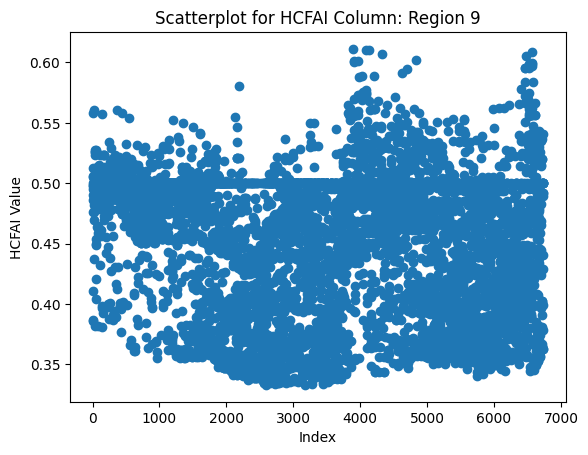

In [18]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title(f'Scatterplot for HCFAI Column: Region {region-1}')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


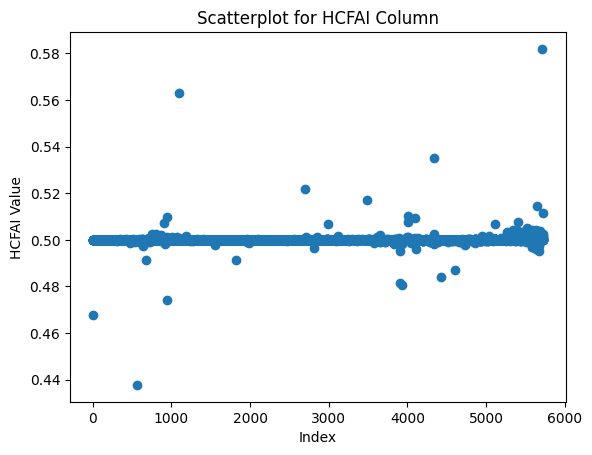

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [19]:
# Specify the file path for the CSV file
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG10/rg10_HCFAI_sum.csv
